In [1]:
# import pmdarima as pm
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
np.__version__

'2.2.5'

In [10]:
stocks_df.dropna()['Symbol'].value_counts().head(15)

Symbol
ZBH     3690
MMM     3690
AOS     3690
ABT     3690
ZBRA    3690
DIS     3690
WMT     3690
WBA     3690
WAB     3690
GWW     3690
WRB     3690
VMC     3690
V       3690
VTRS    3690
VRTX    3690
Name: count, dtype: int64

['ZBH',
 'TECH',
 'CMG',
 'DUK',
 'DOC',
 'IEX',
 'LULU',
 'PNR',
 'RCL',
 'PSX',
 'SOLV']

In [ ]:
sp500_path = '/mnt/FE86DAF186DAAA03/Python/Secondary/Study Repositories/time-series-studies/data/sp_500_Stocks'
stocks_df = pd.read_csv(os.path.join(sp500_path, 'sp500_stocks.csv')).reset_index()
stocks_df.columns = [col.replace(' ', '_').replace('-', '_') for col in stocks_df.columns]

selected_tickers = stocks_df.dropna()['Symbol'].value_counts()[::50].index.to_list()

stocks_df = stocks_df[stocks_df['Symbol'].isin(selected_tickers)].dropna()
stocks_df['Date'] = pd.to_datetime(stocks_df['Date'])
# stocks_df.set_index('Date', inplace=True)

stocks_df.reset_index(drop=True, inplace=True)
stocks_df.drop(columns=['index'], inplace=True)
# stocks_df.to_csv('sp_500_Stocks_sample.csv', index=0)

In [ ]:
sp500_path = '/mnt/FE86DAF186DAAA03/Python/Secondary/Study Repositories/time-series-studies/data/sp_500_Stocks'
stocks_df = pd.read_csv(os.path.join(sp500_path, 'sp500_stocks_sample.csv'))
stocks_df

,Date,Symbol,Adj_Close,Close,High,Low,Open,Volume
0,2010-01-04,TECH,14.769435,17.170000,17.434999,17.067499,17.264999,454400.0
1,2010-01-05,TECH,14.642555,17.022499,17.247499,16.897499,17.122499,282000.0
2,2010-01-06,TECH,14.603847,16.977501,17.115000,16.947500,17.100000,402800.0
3,2010-01-07,TECH,14.638255,17.017500,17.202499,16.892500,17.007500,346400.0
4,2010-01-08,TECH,14.610303,16.985001,17.075001,16.797501,16.969999,455200.0
...,...,...,...,...,...,...,...,...
36429,2024-08-26,ZBH,114.629997,114.629997,116.370003,114.230003,115.320000,913500.0
36430,2024-08-27,ZBH,114.669998,114.669998,115.360001,114.519997,114.669998,914300.0
36431,2024-08-28,ZBH,114.190002,114.190002,115.150002,113.860001,114.720001,687000.0
36432,2024-08-29,ZBH,114.669998,114.669998,115.339996,113.910004,114.919998,801500.0


In [3]:
ts = stocks_df['Close'].dropna()


In [4]:

model = pm.auto_arima(
    ts,
    seasonal=False,
    stepwise=True,
    suppress_warnings=True,
    error_action='ignore',
    trace=True,
)

/home/user/virtualenvs/ts1_venv/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/home/user/virtualenvs/ts1_venv/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/home/user/virtualenvs/ts1_venv/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/home/user/virtualenvs/ts1_venv/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/home/user/virtualenvs/ts1_venv/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was ren

Performing stepwise search to minimize aic
 ARIMA(2,2,2)(0,0,0)[0] intercept   : AIC=inf, Time=9.54 sec
 ARIMA(0,2,0)(0,0,0)[0] intercept   : AIC=21090.473, Time=0.12 sec


/home/user/virtualenvs/ts1_venv/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/home/user/virtualenvs/ts1_venv/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,2,0)(0,0,0)[0] intercept   : AIC=19902.388, Time=0.33 sec


/home/user/virtualenvs/ts1_venv/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=6.11 sec
 ARIMA(0,2,0)(0,0,0)[0]             : AIC=21088.473, Time=0.19 sec


/home/user/virtualenvs/ts1_venv/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/home/user/virtualenvs/ts1_venv/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,2,0)(0,0,0)[0] intercept   : AIC=19387.909, Time=0.92 sec


/home/user/virtualenvs/ts1_venv/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(3,2,0)(0,0,0)[0] intercept   : AIC=19080.202, Time=0.82 sec


/home/user/virtualenvs/ts1_venv/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(4,2,0)(0,0,0)[0] intercept   : AIC=18856.401, Time=1.24 sec


/home/user/virtualenvs/ts1_venv/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(5,2,0)(0,0,0)[0] intercept   : AIC=18808.745, Time=1.53 sec


/home/user/virtualenvs/ts1_venv/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(5,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=14.62 sec


/home/user/virtualenvs/ts1_venv/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(4,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=10.00 sec


/home/user/virtualenvs/ts1_venv/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(5,2,0)(0,0,0)[0]             : AIC=18806.745, Time=0.69 sec


/home/user/virtualenvs/ts1_venv/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(4,2,0)(0,0,0)[0]             : AIC=18854.402, Time=0.60 sec


/home/user/virtualenvs/ts1_venv/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(5,2,1)(0,0,0)[0]             : AIC=inf, Time=5.50 sec


/home/user/virtualenvs/ts1_venv/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(4,2,1)(0,0,0)[0]             : AIC=inf, Time=3.76 sec

Best model:  ARIMA(5,2,0)(0,0,0)[0]          
Total fit time: 56.411 seconds


In [5]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 3690
Model:               SARIMAX(5, 2, 0)   Log Likelihood               -9397.373
Date:                Fri, 02 May 2025   AIC                          18806.745
Time:                        10:18:36   BIC                          18844.023
Sample:                             0   HQIC                         18820.014
                               - 3690                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.9153      0.008   -108.156      0.000      -0.932      -0.899
ar.L2         -0.7584      0.012    -62.380      0.000      -0.782      -0.735
ar.L3         -0.5646      0.013    -43.682      0.000      -0.590      -0.539
ar.L4         -0.3464      0.012    -29.845      0.000      -0.369      -0.324
ar.L5         -0.1157      0.009    -12.793      0.000      -0.133      -0.098
sigma2         9.5638      0.101     95.131      0.000       9.367       9.761
===================================================================================
Ljung-Box (L1) (Q):                   1.56   Jarque-Bera (JB):             11031.53
Prob(Q):                              0.21   Prob(JB):                         0.00
Heteroskedasticity (H):             115.87   Skew:                             0.05
Prob(H) (two-sided):                  0.00   Kurtosis:                        11.47
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [6]:
n_periods = 30
forecast, conf_int = model.predict(n_periods=n_periods, return_conf_int=True)

/home/user/virtualenvs/ts1_venv/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/home/user/virtualenvs/ts1_venv/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
/home/user/virtualenvs/ts1_venv/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/home/user/virtualenvs/ts1_venv/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


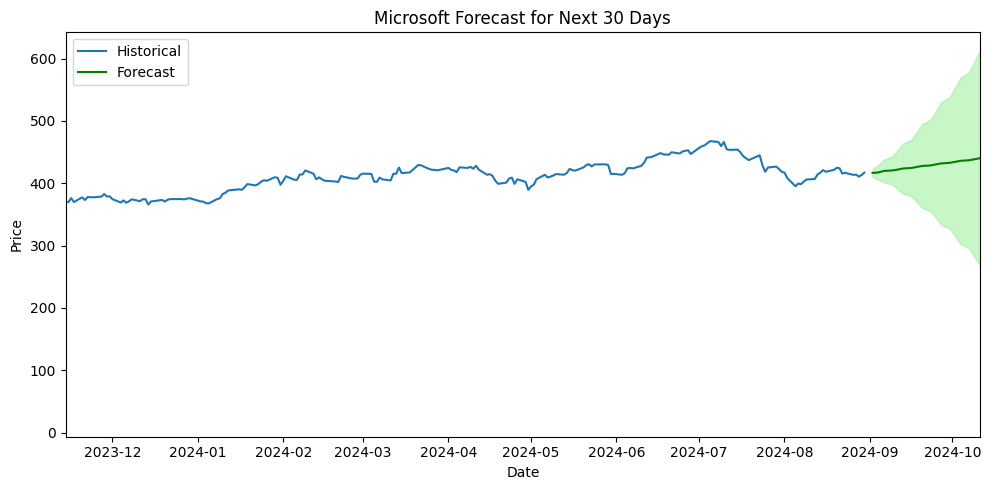

In [7]:
forecast_index = pd.date_range(ts.index[-1], periods=n_periods + 1, freq='B')[1:]

plt.figure(figsize=(10,5))
plt.plot(ts, label='Historical')
plt.plot(forecast_index, forecast, label='Forecast', color='green')
plt.fill_between(forecast_index, conf_int[:, 0], conf_int[:, 1], color='lightgreen', alpha=0.5)
plt.title(f"Microsoft Forecast for Next {n_periods} Days")
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.tight_layout()

plt.xlim(ts.index[-200], forecast_index[-1])
plt.show()


/tmp/ipykernel_10432/1495984278.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_df['Close'] = 26
/home/user/virtualenvs/ts1_venv/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


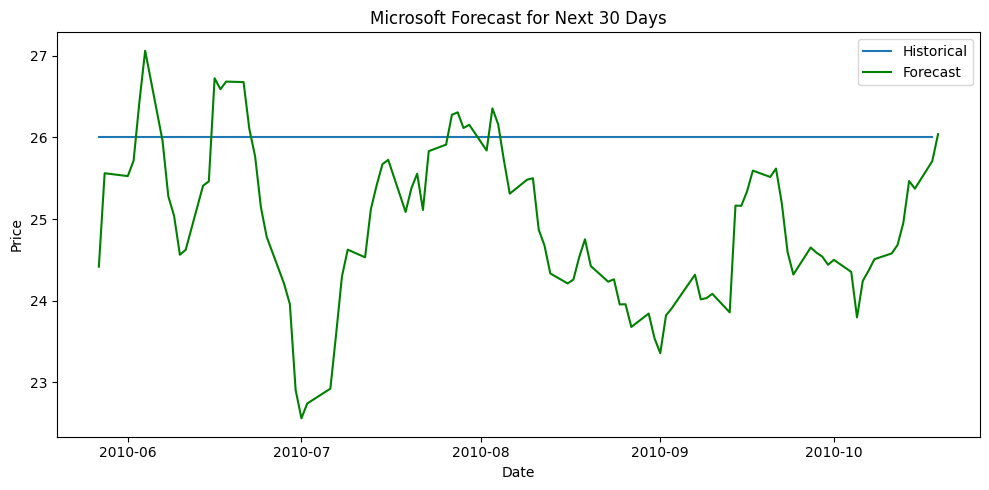

In [ ]:
test_df = stocks_df.iloc[100:200]
test_df['Close'] = 26

forecast, conf_int = model.predict_in_sample(test_df, start=100, end=200, return_conf_int=True)

forecast_index = pd.date_range(forecast.index[-1], periods=n_periods + 1, freq='B')[1:]

plt.figure(figsize=(10,5))
plt.plot(test_df['Close'], label='Historical')
plt.plot(forecast.index, forecast, label='Forecast', color='green')
# plt.fill_between(forecast.index, conf_int[:, 0], conf_int[:, 1], color='lightgreen', alpha=0.5)
plt.title(f"Microsoft Forecast for Next {n_periods} Days")
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.tight_layout()

# plt.xlim(ts.index[-200], forecast_index[-1])
plt.show()



In [42]:
print(len(forecast))
forecast

101


Date
2010-05-27    24.417065
2010-05-28    25.561459
2010-06-01    25.526507
2010-06-02    25.714735
2010-06-03    26.431961
                ...    
2010-10-13    24.952391
2010-10-14    25.465781
2010-10-15    25.372350
2010-10-18    25.709466
2010-10-19    26.040011
Name: predicted_mean, Length: 101, dtype: float64

In [46]:
test_df

,index,Symbol,Adj_Close,Close,High,Low,Open,Volume
Date,,,,,,,,
2010-05-27,1180900,MSFT,19.793890,26.000000,26.360001,25.730000,25.730000,136433600.0
2010-05-28,1180901,MSFT,19.641628,25.799999,26.120001,25.660000,25.840000,67496900.0
2010-06-01,1180902,MSFT,19.710136,25.889999,26.309999,25.520000,25.530001,76152400.0
2010-06-02,1180903,MSFT,20.144093,26.459999,26.480000,25.730000,26.059999,65718800.0
2010-06-03,1180904,MSFT,20.448606,26.860001,26.930000,26.410000,26.549999,67837000.0
...,...,...,...,...,...,...,...,...
2010-10-12,1180995,MSFT,19.004000,24.830000,24.930000,24.430000,24.650000,50141500.0
2010-10-13,1180996,MSFT,19.394337,25.340000,25.540001,24.889999,25.020000,75336500.0
2010-10-14,1180997,MSFT,19.310148,25.230000,25.340000,25.000000,25.290001,51949100.0


In [41]:
print(len(forecast_index))
forecast_index

30


DatetimeIndex(['2010-10-20', '2010-10-21', '2010-10-22', '2010-10-25',
               '2010-10-26', '2010-10-27', '2010-10-28', '2010-10-29',
               '2010-11-01', '2010-11-02', '2010-11-03', '2010-11-04',
               '2010-11-05', '2010-11-08', '2010-11-09', '2010-11-10',
               '2010-11-11', '2010-11-12', '2010-11-15', '2010-11-16',
               '2010-11-17', '2010-11-18', '2010-11-19', '2010-11-22',
               '2010-11-23', '2010-11-24', '2010-11-25', '2010-11-26',
               '2010-11-29', '2010-11-30'],
              dtype='datetime64[ns]', freq='B')